In [2]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor as XGBR,XGBClassifier as XGBC,plot_importance
from lightgbm import LGBMRegressor as LGBMR,LGBMClassifier as LGBMC,plot_importance,Booster
from sklearn.ensemble import RandomForestRegressor as RFR,AdaBoostRegressor as ABR
from numpy import sort
from sklearn.linear_model import LogisticRegression as LR
from mlxtend.regressor import StackingCVRegressor as SCVR
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor as MLPR
from pyecharts.charts import Bar
import pyecharts.options as opts

/Users/caroline/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
%%time
train_data = pd.read_parquet('/Users/caroline/Downloads/train_data.parquet')
test_data = pd.read_parquet('/Users/caroline/Downloads/test_data.parquet')

CPU times: user 17.8 s, sys: 4.69 s, total: 22.5 s
Wall time: 45.7 s


ÊòØÂê¶ËøùÁ∫¶ÂèñÂÜ≥‰∫éÁî®Êà∑ÊúÄËøë‰∏ÄÊ¨°Â∏êÊúüÂêéÁöÑ120Â§©ÊòØÂê¶ÊîØ‰ªòÔºåÊâÄ‰ª•Áî®Êà∑ÁöÑÊúÄÂêé‰∏ÄÊ¨°Êä•Ë°®Êï∞ÊçÆËá≥ÂÖ≥ÈáçË¶ÅÔºåÂÆÉÂ∞ÜÊòØÊàë‰ª¨Áî®‰∫éËÆ≠ÁªÉÁöÑÊï∞ÊçÆ‰∏ªË¶ÅÊù•Ê∫êÔºå‰ΩÜÊòØÂ§ßÈÉ®ÂàÜÁî®Êà∑Êúâ13‰∏™ÊúàÁöÑË¥¶ÊúüÊï∞ÊçÆÔºåËøôÂÖ∂‰∏≠ÊàñËÆ∏‰πüÈöêËóèÁùÄ‰ø°ÊÅØÔºåÊääÂéÜÂè≤Êï∞ÊçÆÁî®‰∫éÂº•Ë°•ÂΩìÂâçË¥¶Êúü‰∏Ä‰∫õÁº∫Â§±ÊàñÂºÇÂ∏∏Êï∞ÊçÆÂ∏¶Êù•ÁöÑËØØÂ∑Æ‰∏çÂ§±‰∏∫‰∏ÄÁßçÁ≠ñÁï•„ÄÇ

È¶ñÂÖàÊàë‰ª¨ÂèñÊúÄÂêé‰∏Ä‰∏™Ë¥¶ÊúüÁöÑÊï∞ÊçÆÔºåÂØπÂÖ®ÈÉ®ÁâπÂæÅÂÅöÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÔºåÂàùÊ≠•ÊèêÂèñÂá∫ÂíåÁõÆÊ†áÔºàtargetÔºâÁõ∏ÂÖ≥Á≥ªÊï∞ÊúÄÂ§ßÁöÑ‰∏Ä‰∫õÁâπÂæÅÔºàtop_featuresÔºâÔºåÂêéÁª≠Â∞ÜÊèêÂèñËøô‰∫õÁâπÂæÅÁöÑÂéÜÂè≤Êï∞ÊçÆÊù•ÊûÑÂª∫Êñ∞ÁâπÂæÅ„ÄÇ

In [187]:
data = train_data.groupby('customer_ID').tail(1)
corr_matrix = data.corr()

In [188]:
corr_target = pd.DataFrame(corr_matrix.target)
top_features = corr_target[(abs(corr_target['target'])>=0.5)&(abs(corr_target['target'])!=1)].index.to_list()
top_features

['P_2',
 'B_2',
 'B_3',
 'D_44',
 'D_48',
 'B_7',
 'B_9',
 'D_55',
 'D_61',
 'B_18',
 'B_33']

Êï∞ÊçÆÈõÜÁöÑÁâπÂæÅÈÉΩÊòØÂåøÂêçÁöÑÔºåÂàÜ‰∏∫‰ª•‰∏ã‰∏ÄËà¨Á±ªÂà´Ôºö

D_* = ÊãñÊ¨†ÂèòÈáè

S_* = ÊîØÂá∫ÂèòÈáè

P_* = ‰ªòÊ¨æÂèòÈáè

B_* = Âπ≥Ë°°ÂèòÈáè

R_* = È£éÈô©ÂèòÈáè

ËÄÉËôëÈÄöËøáËÄÉÂØüÁâπÂæÅÁ±ªÂà´ÁöÑÂÖ±ÊÄßÔºåÈÄöËøáÁâπÂæÅÁªÑÂêàÊûÑÂª∫Êñ∞ÁöÑÁâπÂæÅ„ÄÇ


In [207]:
data['R_12'].value_counts(dropna=False)

 1.006702    17
 1.001040    16
 1.000950    16
 1.000563    16
 1.007287    16
 1.002763    16
 1.000380    15
 1.005476    15
 1.005637    15
 1.007368    15
 1.002328    15
 1.004805    15
 1.008876    15
 1.006646    15
 1.002083    15
 1.005855    15
 1.000723    15
 1.005594    15
 1.003522    15
 1.001481    15
 1.004294    15
 1.004558    15
 1.002116    15
 1.004810    15
 1.001397    15
 1.003372    15
 1.000134    14
 1.001542    14
 1.008426    14
 1.009115    14
 1.004278    14
 1.008459    14
 1.002477    14
 1.003198    14
 1.008119    14
 1.005458    14
 1.003064    14
 1.009256    14
 1.006558    14
 1.000884    14
 1.001755    14
 1.002048    14
 1.001753    14
 1.001923    14
 1.004465    14
 1.009002    14
 1.005809    14
 1.002359    14
 1.009474    14
 1.006000    14
 1.002235    14
 1.007210    14
 1.006166    14
 1.007322    14
 1.008275    14
 1.003558    14
 1.005503    14
 1.002969    14
 1.002461    14
 1.000646    14
 1.007727    14
 1.008853    14
 1.00718

In [4]:
r_bin = ['R_2', 'R_4', 'R_15', 'R_19', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_28', 'R_7', 'R_12', 'R_14']

In [5]:
train  = train_data[['customer_ID'] + r_bin]

In [10]:
train.R_7.fillna(0).astype(np.float32).value_counts()
# .describe(percentiles=[0.9])

0      5475972
1        20909
2         9191
3         4456
4         2500
        ...   
120          1
242          1
315          1
164          1
188          1
Name: R_7, Length: 172, dtype: int64

In [5]:
#Áº∫Â§±ÂÄºÊü•Áúã
n_df_train = pd.DataFrame(train_data.isnull().sum(axis=0),columns=['n_rate_train'])/len(train_data)
n_df_test = pd.DataFrame(test_data.isnull().sum(axis=0),columns=['n_rate_test'])/len(test_data)
n_df = pd.merge(n_df_train,n_df_test,how='left',left_index=True,right_index=True)

In [6]:
mix_df = n_df.merge(corr_target,how='outer',left_index=True,right_index=True)

In [7]:
#ÂâîÈô§ÂíåÁõÆÊ†áÂÖ≥ËÅîÂ∫¶Â∞èÊàñÁº∫Â§±‰∏•ÈáçÁöÑÁâπÂæÅ
drop_features = mix_df[(abs(mix_df['target'])<0.05)|(mix_df['n_rate_train']>0.5)].index.to_list()
#‰øùÁïôB_17,B_42 
drop_features.remove('B_17')
drop_features.remove('B_42')
drop_features.append('S_2')#Êó•ÊúüÂàó


In [8]:
drop_features

['B_10',
 'B_12',
 'B_13',
 'B_15',
 'B_26',
 'B_27',
 'B_29',
 'B_36',
 'B_39',
 'B_40',
 'D_102',
 'D_105',
 'D_106',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142',
 'D_144',
 'D_42',
 'D_49',
 'D_50',
 'D_53',
 'D_56',
 'D_66',
 'D_69',
 'D_73',
 'D_76',
 'D_82',
 'D_87',
 'D_88',
 'D_93',
 'R_14',
 'R_18',
 'R_23',
 'R_26',
 'R_28',
 'R_9',
 'S_12',
 'S_17',
 'S_18',
 'S_19',
 'S_26',
 'S_5',
 'S_9',
 'S_2']

In [9]:
train_data = train_data.drop(columns=drop_features)
test_data = test_data.drop(columns=drop_features)

In [10]:
top_features.append('customer_ID')
top_features = list(set(top_features))

In [11]:
#ÊääÈáçË¶ÅÁâπÂæÅÁöÑÂùáÂÄº„ÄÅ‰∏≠ÂÄºÁ≠â‰Ωú‰∏∫üÜïÁâπÂæÅ
extra_features = train_data[top_features].groupby('customer_ID').agg(['mean','median','std','sum','max','min'])
train_data = train_data.groupby('customer_ID').tail(1)
train_data = pd.merge(train_data,extra_features,how='left',on='customer_ID')

/var/folders/7l/tgtyfd113vbfk2nw_xks1v000000gn/T/ipykernel_15513/3749302612.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  train_data = pd.merge(train_data,extra_features,how='left',on='customer_ID')


In [12]:
extra_features = test_data[top_features].groupby('customer_ID').agg(['mean','median','std','sum','max','min'])
test_data = test_data.groupby('customer_ID').tail(1)
test_data = pd.merge(test_data,extra_features,how='left',on='customer_ID')

/var/folders/7l/tgtyfd113vbfk2nw_xks1v000000gn/T/ipykernel_15513/4212107262.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  test_data = pd.merge(test_data,extra_features,how='left',on='customer_ID')


In [13]:
features_fill_na_mode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64','D_68']
for feature_mode in features_fill_na_mode:
    mode_value = train_data[feature_mode].value_counts().sort_values(ascending=False).index[0]
    train_data[feature_mode] = train_data[feature_mode].fillna(mode_value)
for feature_mode in features_fill_na_mode:
    mode_value = test_data[feature_mode].value_counts().sort_values(ascending=False).index[0]
    test_data[feature_mode] = test_data[feature_mode].fillna(mode_value)
    

In [14]:
train_data[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64','D_68']].isnull().sum(axis=0)

B_30     0
B_38     0
D_114    0
D_116    0
D_117    0
D_120    0
D_126    0
D_63     0
D_64     0
D_68     0
dtype: int64

In [15]:
train_data.fillna(train_data.median(),inplace=True)
test_data.fillna(test_data.median(),inplace=True)

/var/folders/7l/tgtyfd113vbfk2nw_xks1v000000gn/T/ipykernel_15513/3665293125.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.median(),inplace=True)
/var/folders/7l/tgtyfd113vbfk2nw_xks1v000000gn/T/ipykernel_15513/3665293125.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.fillna(test_data.median(),inplace=True)


In [16]:
pd.set_option('display.max_row', None)
test_data.isnull().sum(axis=0)

customer_ID       0
P_2               0
D_39              0
B_1               0
B_2               0
R_1               0
S_3               0
D_41              0
B_3               0
D_43              0
D_44              0
B_4               0
D_45              0
B_5               0
R_2               0
D_46              0
D_47              0
D_48              0
B_6               0
B_7               0
B_8               0
D_51              0
B_9               0
R_3               0
D_52              0
P_3               0
B_11              0
S_6               0
D_54              0
R_4               0
S_7               0
S_8               0
D_55              0
R_5               0
D_58              0
B_14              0
D_59              0
D_60              0
D_61              0
S_11              0
D_62              0
D_63              0
D_64              0
D_65              0
B_16              0
B_17              0
B_18              0
B_19              0
B_20              0
D_68              0


In [17]:
test_data.shape

(924621, 180)

In [18]:
train_data.shape

(458913, 181)

In [19]:
Y = train_data.target.values.ravel()
train_data = train_data.drop(columns=['target'])
train_data.shape

(458913, 180)

In [20]:
total = pd.concat([train_data,test_data])
total = total.set_index('customer_ID')
total.shape

(1383534, 179)

In [31]:
categories = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']
X = pd.get_dummies(total,columns=categories)

In [32]:
X.columns

Index([     'P_2',     'D_39',      'B_1',      'B_2',      'R_1',      'S_3',
           'D_41',      'B_3',     'D_43',     'D_44',
       ...
        'D_63_XZ',   'D_64_O',   'D_64_R',   'D_64_U', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=209)

In [33]:
X.shape

(1383534, 209)

In [34]:
X.columns = [str(i).replace('(','').replace(')','').replace(', ','_').replace('\'','') for i in X.columns.to_list()]

In [35]:
X_predict = X.iloc[458913:,:]
X_train_or_test = X.iloc[:458913,:]

In [36]:
X_train_or_test.shape

(458913, 209)

In [37]:
Y.shape

(458913,)

In [100]:
X_train,X_test, y_train, y_test =train_test_split(X_train_or_test,Y,test_size=0.3)

In [29]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [ ]:
params ={
    'boosting_type':'gbdt',
    'learning_rate':0.05,
    'n_estimators':900,
    'min_split_gain':0,
    'min_child_weight':0.001,
    'max_depth':5,
    'num_leaves':31,
}

In [95]:
folds = KFold(n_splits=5, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(folds.split(X_train_or_test, Y)):
    X_train, y_train = X_train_or_test.iloc[train_idx,:], Y[train_idx]
    X_val, y_val = X_train_or_test.iloc[val_idx,:], Y[val_idx]
    lgbm = LGBMR(**params,random_state=1).fit(X_train, y_train)
    lgbm.booster_.save_model('LGBMmodel_{}.txt'.format(fold))
    val_predict = lgbm.predict(X_val) 
    y_val1 = pd.DataFrame(y_val)
    y_val1.columns = ['target']
    val_predict1 = pd.DataFrame(val_predict)
    val_predict1.columns = ['prediction']
    s = amex_metric(y_val1,val_predict1)
    print("n_fold:{},score:{}".format(fold,s))

n_fold:0,score:0.7844928428285869
n_fold:1,score:0.7799476155859844
n_fold:2,score:0.7766861819651252
n_fold:3,score:0.7859713008051517
n_fold:4,score:0.774060102825594


In [214]:
lgbm = LGBMC(**params,random_state=1).fit(X_train,y_train)
test_predict = lgbm.predict(X_test) 
y_train_predict = lgbm.predict(X_train)
y_test1 = pd.DataFrame(y_test)
y_test1.columns = ['target']
test_predict1 = pd.DataFrame(test_predict)
test_predict1.columns = ['prediction']
score = amex_metric(y_test1,test_predict1)
score

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: P_2, D_39, B_1, B_2, R_1, S_3, D_41, B_3, D_43, D_44, B_4, D_45, B_5, R_2, D_46, D_47, D_48, B_6, B_7, B_8, D_51, B_9, R_3, D_52, P_3, B_11, S_6, D_54, R_4, S_7, S_8, D_55, R_5, D_58, B_14, D_59, D_60, D_61, S_11, D_62, D_65, B_16, B_17, B_18, B_19, B_20, R_6, S_13, B_21, B_22, D_70, D_71, D_72, S_15, B_23, P_4, D_74, D_75, B_24, R_7, D_77, B_25, D_78, D_79, R_8, S_16, D_80, R_10, R_11, D_81, R_12, B_28, R_13, D_83, R_15, D_84, R_16, D_86, R_17, B_31, R_19, B_32, S_20, R_20, R_21, B_33, D_89, R_22, D_91, D_92, D_94, R_24, R_25, D_96, S_22, S_23, S_24, S_25, D_103, D_104, D_107, B_37, R_27, D_112, S_27, D_113, D_115, D_118, D_119, D_121, D_122, D_123, D_124, D_125, D_127, D_128, D_129, B_41, D_130, D_131, D_133, D_139, D_140, D_141, D_143, D_145, D_44_mean, D_44_median, D_44_std, D_44_sum, D_44_max, D_44_min, B_9_mean, B_9_median, B_9_std, B_9_sum, B_9_max, B_9_min, B_3_mean, B_3_median, B_3_std, B_3_sum, B_3_max, B_3_min, D_61_mean, D_61_median, D_61_std, D_61_sum, D_61_max, D_61_min, D_48_mean, D_48_median, D_48_std, D_48_sum, D_48_max, D_48_min, B_7_mean, B_7_median, B_7_std, B_7_sum, B_7_max, B_7_min, D_55_mean, D_55_median, D_55_std, D_55_sum, D_55_max, D_55_min, B_30_0.0, B_30_1.0, B_30_2.0, B_38_1.0, B_38_2.0, B_38_3.0, B_38_4.0, B_38_5.0, B_38_6.0, B_38_7.0, D_114_0.0, D_114_1.0, D_116_0.0, D_116_1.0, D_117_-1.0, D_117_1.0, D_117_2.0, D_117_3.0, D_117_4.0, D_117_5.0, D_117_6.0, D_120_0.0, D_120_1.0, D_126_0.0, D_126_1.0, D_63_CL, D_63_CO, D_63_CR, D_63_XL, D_63_XM, D_63_XZ, D_64_O, D_64_R, D_64_U, D_68_1.0, D_68_2.0, D_68_3.0, D_68_4.0, D_68_5.0, D_68_6.0, c_PD_239, c_PB_29, c_PR_21, c_BBBB, c_BBBB1, c_BBBB2, c_RRR0, c_RRR1, c_PD_348, c_PD_355, c_PD_439, c_PB_49, c_PR_41

In [53]:
for i in range(5,25,5):
    for j in range(100,1500,100):
        lgbm = LGBMR(learning_rate=i/100,n_estimators=j,random_state=1,).fit(X_train,y_train)
        test_predict = lgbm.predict(X_test) 
        y_train_predict = lgbm.predict(X_train)
        y_test1 = pd.DataFrame(y_test)
        y_test1.columns = ['target']
        test_predict1 = pd.DataFrame(test_predict)
        test_predict1.columns = ['prediction']
        score = amex_metric(y_test1,test_predict1)
        print("i:{},j:{},score:{}".format(i,j,score))


i:5,j:100,score:0.7694091437921491
i:5,j:200,score:0.7771272018492108
i:5,j:300,score:0.7782785756001841
i:5,j:400,score:0.7794050108505788
i:5,j:500,score:0.7796143287571342
i:5,j:600,score:0.7794641475046262
i:5,j:700,score:0.7801042631409318
i:5,j:800,score:0.7801961274903078
i:5,j:900,score:0.780365176219121
i:10,j:100,score:0.7758545946278159
i:10,j:200,score:0.7766311573260153
i:10,j:300,score:0.7770152373417021
i:10,j:400,score:0.7766558400167396
i:10,j:500,score:0.7765391860451791
i:10,j:600,score:0.7758375611759212
i:10,j:700,score:0.7754795203139124
i:10,j:800,score:0.7753927281485813
i:10,j:900,score:0.774736636903081
i:15,j:100,score:0.7757086283126186
i:15,j:200,score:0.7752713880621701
i:15,j:300,score:0.7741363186217216
i:15,j:400,score:0.7737342370209888
i:15,j:500,score:0.7730426525154546
i:15,j:600,score:0.7718286419974588
i:15,j:700,score:0.7709401160254836
i:15,j:800,score:0.770207848400712
i:15,j:900,score:0.7691370763867331


In [56]:
for i in range(2,32,1):
    for j in range(1):
        lgbm = LGBMR(learning_rate=0.05,n_estimators=900,max_depth=5,num_leaves=i,random_state=1,).fit(X_train,y_train)#0.7754706768660901
        test_predict = lgbm.predict(X_test) 
        y_train_predict = lgbm.predict(X_train)
        y_test1 = pd.DataFrame(y_test)
        y_test1.columns = ['target']
        test_predict1 = pd.DataFrame(test_predict)
        test_predict1.columns = ['prediction']
        score = amex_metric(y_test1,test_predict1)
        print("i:{},j:{},score:{}".format(i,j,score))


i:2,j:0,score:0.753476591987293
i:3,j:0,score:0.7672161869723174
i:4,j:0,score:0.7716975169725918
i:5,j:0,score:0.7738666386133443
i:6,j:0,score:0.7760349990825586
i:7,j:0,score:0.7775382386851677
i:8,j:0,score:0.7780849990554091
i:9,j:0,score:0.778851524958281
i:10,j:0,score:0.7772517692592368
i:11,j:0,score:0.7790456296781914
i:12,j:0,score:0.7790041324756087
i:13,j:0,score:0.7793094752848573
i:14,j:0,score:0.7796851012123621
i:15,j:0,score:0.7795566222874099
i:16,j:0,score:0.7801256149825556
i:17,j:0,score:0.7802101690602387
i:18,j:0,score:0.7798720100240613
i:19,j:0,score:0.779478057380554
i:20,j:0,score:0.779672124862352
i:21,j:0,score:0.7796698712836733
i:22,j:0,score:0.7803733271974241
i:23,j:0,score:0.7795642971571879
i:24,j:0,score:0.7807396583666696
i:25,j:0,score:0.7796473958629344
i:26,j:0,score:0.7796675107562564
i:27,j:0,score:0.7796634394528625
i:28,j:0,score:0.7787157081470407
i:29,j:0,score:0.7791976166424368
i:30,j:0,score:0.7794397730018843
i:31,j:0,score:0.780351779

In [ ]:
xgbr =  XGBR(n_estimators=70,max_depth=5,random_state=123).fit(X_train,y_train)
test_predict = xgbr.predict(X_test) 
y_train_predict = xgbr.predict(X_train)
y_test1 = pd.DataFrame(y_test)
y_test1.columns = ['target']
test_predict1 = pd.DataFrame(test_predict)
test_predict1.columns = ['prediction']
score = amex_metric(y_test1,test_predict1)
score

/Users/caroline/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.7680404821327709

In [ ]:
nn= MLPR(random_state=123).fit(X_train,y_train)
test_predict = nn.predict(X_test) 
y_train_predict = xgbr.predict(X_train)
y_test1 = pd.DataFrame(y_test)
y_test1.columns = ['target']
test_predict1 = pd.DataFrame(test_predict)
test_predict1.columns = ['prediction']
score = amex_metric(y_test1,test_predict1)
score

0.7694922364382959

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

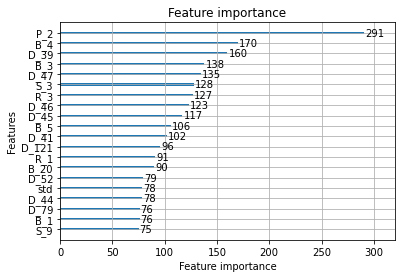

In [ ]:
plot_importance(lgbm,max_num_features=20)

In [103]:
lgbm = LGBMR(n_estimators=240,learning_rate=0.015,random_state=123)
xgbr =  XGBR(n_estimators=70,max_depth=5,random_state=123)
nn= MLPR()
scvr =  SCVR(regressors=[lgbm,xgbr], meta_regressor=nn,random_state=123).fit(X_train,y_train)
test_predict = scvr.predict(X_test)
y_train_predict = scvr.predict(X_train)
y_test1 = pd.DataFrame(y_test)
y_test1.columns = ['target']
test_predict1 = pd.DataFrame(test_predict)
test_predict1.columns = ['prediction']
score = amex_metric(y_test1,test_predict1)
score

KeyboardInterrupt: 

In [ ]:
prediction = scvr.predict(X_predict)
bst = Booster(model_file='LGBMmodel_5.txt')
predictions = bst.predict(X_predict)
submission_1 = pd.DataFrame({"customer_ID":X_predict.index,"prediction":prediction})
submission_1.to_csv('submission.csv', index=False)

In [59]:
prediction = lgbm.predict(X_predict)

In [60]:
prediction.mean()

0.2581252869351814

In [62]:
prediction[prediction>1]=1
prediction[prediction<0]=0


In [63]:
submission = pd.DataFrame({"customer_ID":X_predict.index,"prediction":prediction})

<AxesSubplot:>

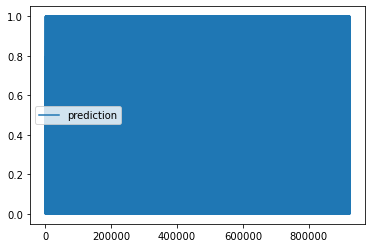

In [64]:
submission.plot()

In [65]:
submission.head()

customer_ID  prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...    0.000000
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...    0.002483
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...    0.071128
3  00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...    0.314556
4  00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...    0.793487

In [66]:
submission.to_csv('submission.csv', index=False)

In [212]:
X_train.head()

P_2  D_39   B_1   B_2  \
customer_ID                                                                  
2465e53326b86cbfbc79585632bf0ac6ec54f9bfc3dca6b...  0.91  0.00  0.00  1.01   
138a5df5d520b3a88bcbaec713515bff21ff8dca89b51d7...  0.96  0.01  0.02  0.82   
885f1bb34ea169940d30d37404b1e6f8f4d83be332cf392...  0.64  0.33  0.05  0.64   
1e6d6320ebd8efe062e43f955db5f5ab919bb8230f9d0d1...  0.87  0.04  0.48  0.04   
574e5df164a3f8f36a45e110f302c01bd581e4d5f273f16...  0.42  0.33  0.05  0.66   

                                                     R_1   S_3  D_41   B_3  \
customer_ID                                                                  
2465e53326b86cbfbc79585632bf0ac6ec54f9bfc3dca6b...  0.00  0.16  0.00  0.00   
138a5df5d520b3a88bcbaec713515bff21ff8dca89b51d7...  0.25  0.09  0.01  0.02   
885f1bb34ea169940d30d37404b1e6f8f4d83be332cf392...  0.00  0.18  0.75  0.02   
1e6d6320ebd8efe062e43f955db5f5ab919bb8230f9d0d1...  0.00  0.15  0.00  0.48   
574e5df164a3f8f36a45e110f302c01bd581e4d5f273f16...  0.00  0.66  0.00  0.02   

                                                    D_43  D_44  ... c_BBBB  \
customer_ID                                                     ...          
2465e53326b86cbfbc79585632bf0ac6ec54f9bfc3dca6b...  0.14  0.01  ...   0.31   
138a5df5d520b3a88bcbaec713515bff21ff8dca89b51d7...  0.50  0.01  ...   0.05   
885f1bb34ea169940d30d37404b1e6f8f4d83be332cf392...  0.02  0.00  ...   5.80   
1e6d6320ebd8efe062e43f955db5f5ab919bb8230f9d0d1...  0.05  0.13  ...   0.15   
574e5df164a3f8f36a45e110f302c01bd581e4d5f273f16...  0.06  0.26  ...   0.01   

                                                   c_BBBB1 c_BBBB2 c_RRR0  \
customer_ID                                                                 
2465e53326b86cbfbc79585632bf0ac6ec54f9bfc3dca6b...   -1.04    0.06   0.53   
138a5df5d520b3a88bcbaec713515bff21ff8dca89b51d7...   -0.72    0.04  39.02   
885f1bb34ea169940d30d37404b1e6f8f4d83be332cf392...    0.63    0.33   1.03   
1e6d6320ebd8efe062e43f955db5f5ab919bb8230f9d0d1...    0.87    2.31   0.63   
574e5df164a3f8f36a45e110f302c01bd581e4d5f273f16...    0.78    0.52   8.39   

                                                   c_RRR1 c_PD_348 c_PD_355  \
customer_ID                                                                   
2465e53326b86cbfbc79585632bf0ac6ec54f9bfc3dca6b...   0.19     0.14     0.14   
138a5df5d520b3a88bcbaec713515bff21ff8dca89b51d7...   0.22     0.48     0.35   
885f1bb34ea169940d30d37404b1e6f8f4d83be332cf392...   0.18     0.82     0.51   
1e6d6320ebd8efe062e43f955db5f5ab919bb8230f9d0d1...   0.04     0.80     0.76   
574e5df164a3f8f36a45e110f302c01bd581e4d5f273f16...   0.02     5.41     2.91   

                                                   c_PD_439 c_PB_49 c_PR_41  
customer_ID                                                                  
2465e53326b86cbfbc79585632bf0ac6ec54f9bfc3dca6b...     0.00    0.00    0.00  
138a5df5d520b3a88bcbaec713515bff21ff8dca89b51d7...     0.01    0.00    0.25  
885f1bb34ea169940d30d37404b1e6f8f4d83be332cf392...     0.33    0.34    0.00  
1e6d6320ebd8efe062e43f955db5f5ab919bb8230f9d0d1...     0.04    0.17    0.00  
574e5df164a3f8f36a45e110f302c01bd581e4d5f273f16...     0.33    0.00    0.00  

[5 rows x 221 columns]